<a href="https://colab.research.google.com/github/saniagupta3107/quiz-using-tkinter/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [ ]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
data = pd.read_csv("/content/creditcard.csv")



In [ ]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())


(7973, 31)
               Time           V1           V2           V3           V4  \
count   7973.000000  7973.000000  7973.000000  7973.000000  7973.000000   
mean    4257.151261    -0.299740     0.295226     0.899355     0.215736   
std     3198.964299     1.498341     1.283914     1.090297     1.447057   
min        0.000000   -23.066842   -25.640527   -12.389545    -4.657545   
25%     1531.000000    -1.046362    -0.237359     0.372435    -0.687521   
50%     3635.000000    -0.416341     0.335446     0.948695     0.223379   
75%     6662.000000     1.122758     0.950582     1.597949     1.131542   
max    10981.000000     1.685314     8.261750     4.101716     7.380245   

                V5           V6           V7           V8           V9  ...  \
count  7973.000000  7973.000000  7973.000000  7973.000000  7973.000000  ...   
mean     -0.025285     0.157286    -0.026445    -0.070525     0.655244  ...   
std       1.167218     1.325015     1.063709     1.332568     1.156618  ... 

In [ ]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0031458411979363283
Fraud Cases: 25
Valid Transactions: 7947


In [ ]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()


Amount details of the fraudulent transaction


count      25.000000
mean      106.308400
std       372.676883
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
print('details of valid transaction')
valid.Amount.describe()


details of valid transaction


count    7947.000000
mean       65.284891
std       194.126547
min         0.000000
25%         4.795000
50%        15.950000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

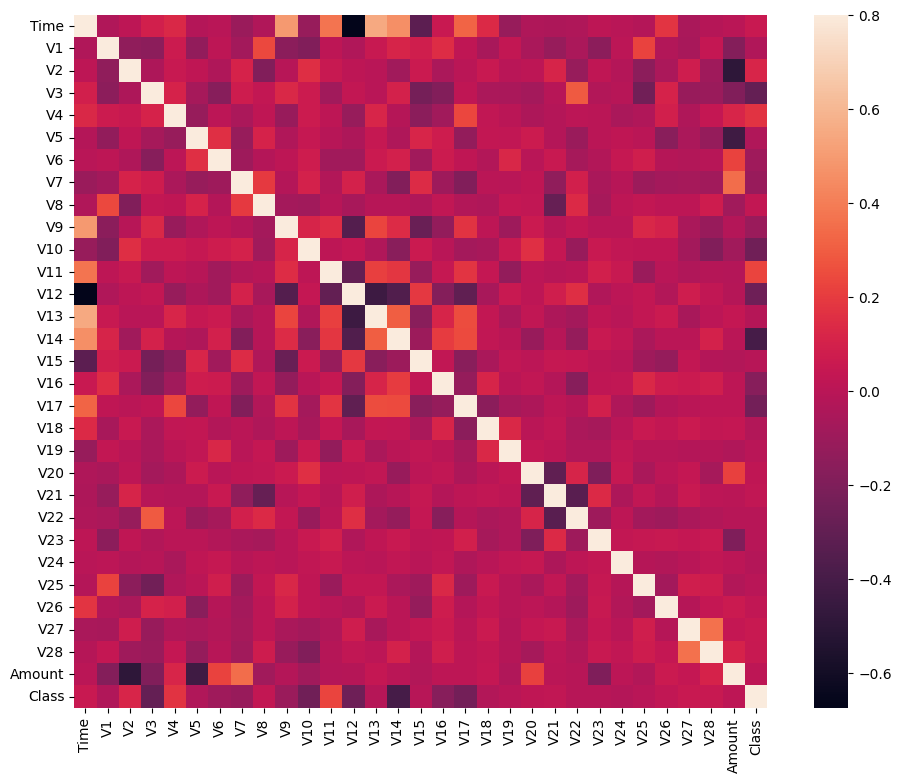

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values


(7973, 30)
(7973,)


In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


In [ ]:
imputer = SimpleImputer(strategy='mean')
xTrain = imputer.fit_transform(xTrain)
xTest = imputer.transform(xTest)
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)


In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 1.0
The precision is 1.0
The recall is 1.0
The F1-Score is 1.0
The Matthews correlation coefficient is1.0


In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

# Handle potential NaN values in yTrain and yTest
# You can either remove rows with NaN or impute them
# Here we'll demonstrate removing rows with NaN
# First find indices of NaN values
nan_indices_train = np.isnan(yTrain)
nan_indices_test = np.isnan(yTest)

# Remove those indices from x and y arrays
xTrain = xTrain[~nan_indices_train]
yTrain = yTrain[~nan_indices_train]
xTest = xTest[~nan_indices_test]
yTest = yTest[~nan_indices_test]

imputer = SimpleImputer(strategy='mean')
xTrain = imputer.fit_transform(xTrain)
xTest = imputer.transform(xTest)
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

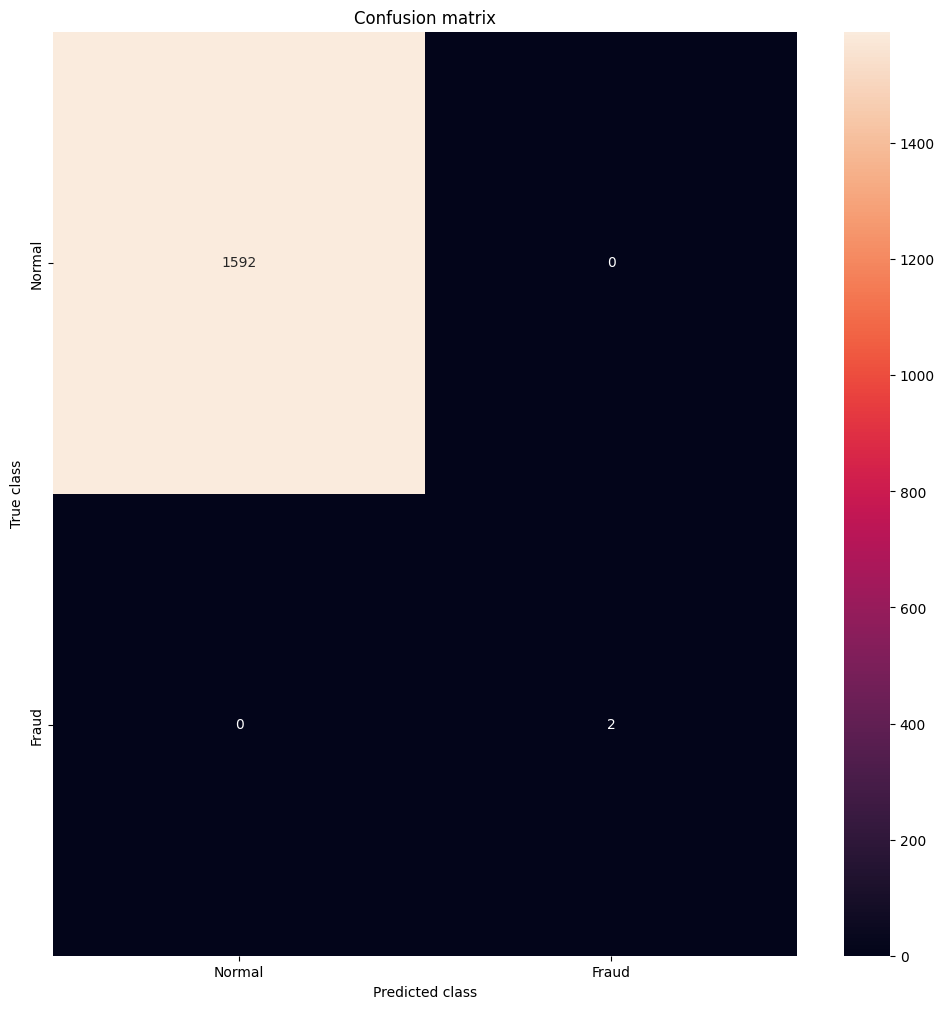

In [ ]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
